In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)
import mne, scipy
from scipy import signal

In [ ]:
raw = mne.io.read_raw_bdf(r"D:\EEG Dataset\sub-hc4\ses-hc\eeg\sub-hc4_ses-hc_task-rest_eeg.bdf")

Extracting EDF parameters from D:\EEG Dataset\sub-hc4\ses-hc\eeg\sub-hc4_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...


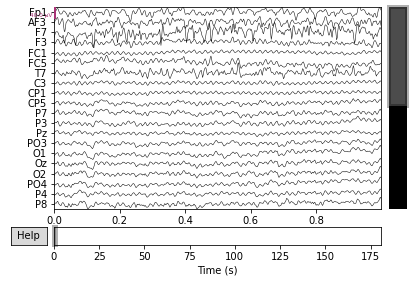

Effective window size : 4.000 (s)


<ipython-input-694-fca34042beab>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax = 20)


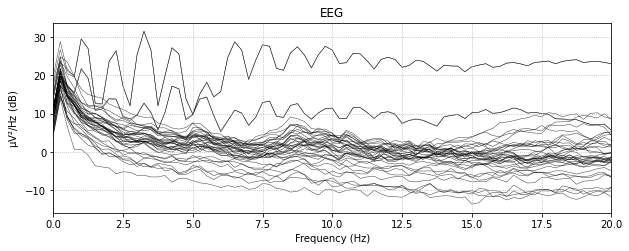

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 40 EEG, 1 STIM
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2011-02-04 11:50:44 UTC
 nchan: 41
 projs: []
 sfreq: 512.0 Hz
>

In [ ]:
raw.plot(duration = 1)
raw.plot_psd(fmax = 20)
raw.info

In [ ]:
header = ','.join(raw.ch_names)
np.savetxt('s01.csv', raw.get_data().T, delimiter=',', header=header)

In [ ]:
import pandas as pd
df = pd.read_csv("s01.csv")
df = df.drop(['Status'], axis = 1)

In [ ]:
#df = df[['Cz','Fz', 'Pz', 'FC1', 'FC2','CP1', 'CP2','F3', 'C3', 'P3', 'F4', 'C4', 'P4', 'T7', 'T8']]

In [ ]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=40, random_state=1, tol=0.05)
comps = ica.fit_transform(df.iloc[:,:].values)
A_ = ica.mixing_

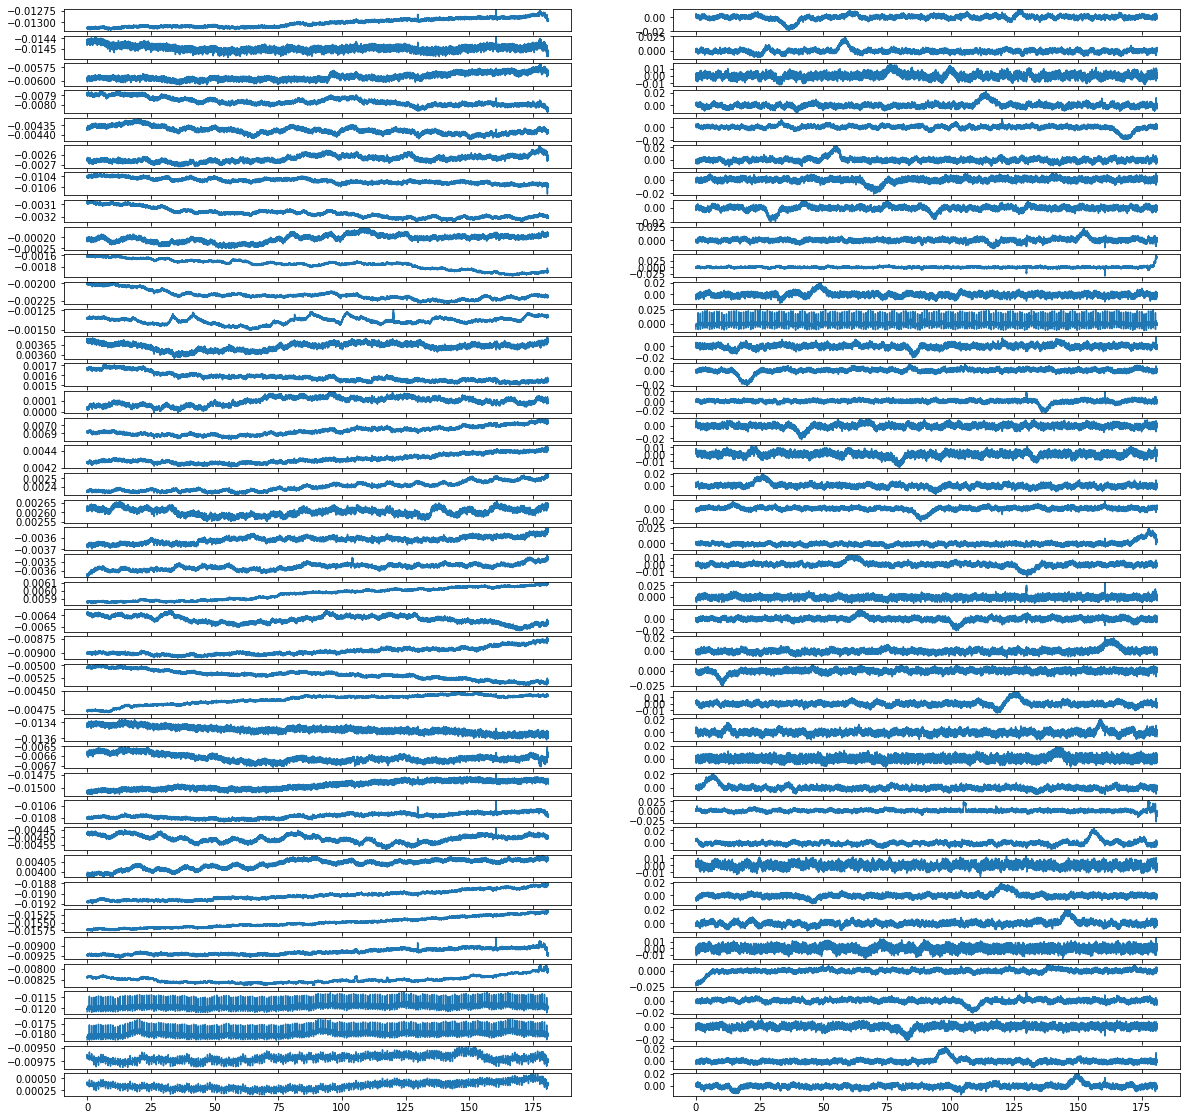

In [ ]:
fig, axs = plt.subplots(40, 2, figsize=(20,20))
x = []
#fig.tight_layout()
for i in range(0,df.shape[0]):
    x.append(i*0.001953125)

for i in range(40):
    col1 = df.iloc[:,i].values
    axs[i, 0].plot(x, col1)
    #axs[i, 0].set_title(i)

for i in range(40):
    col1 = comps[:,i]
    axs[i, 1].plot(x, col1)
    #axs[i, 1].set_title(i)

In [ ]:
#comps[:28] = 0

In [ ]:
final = ica.inverse_transform(comps)

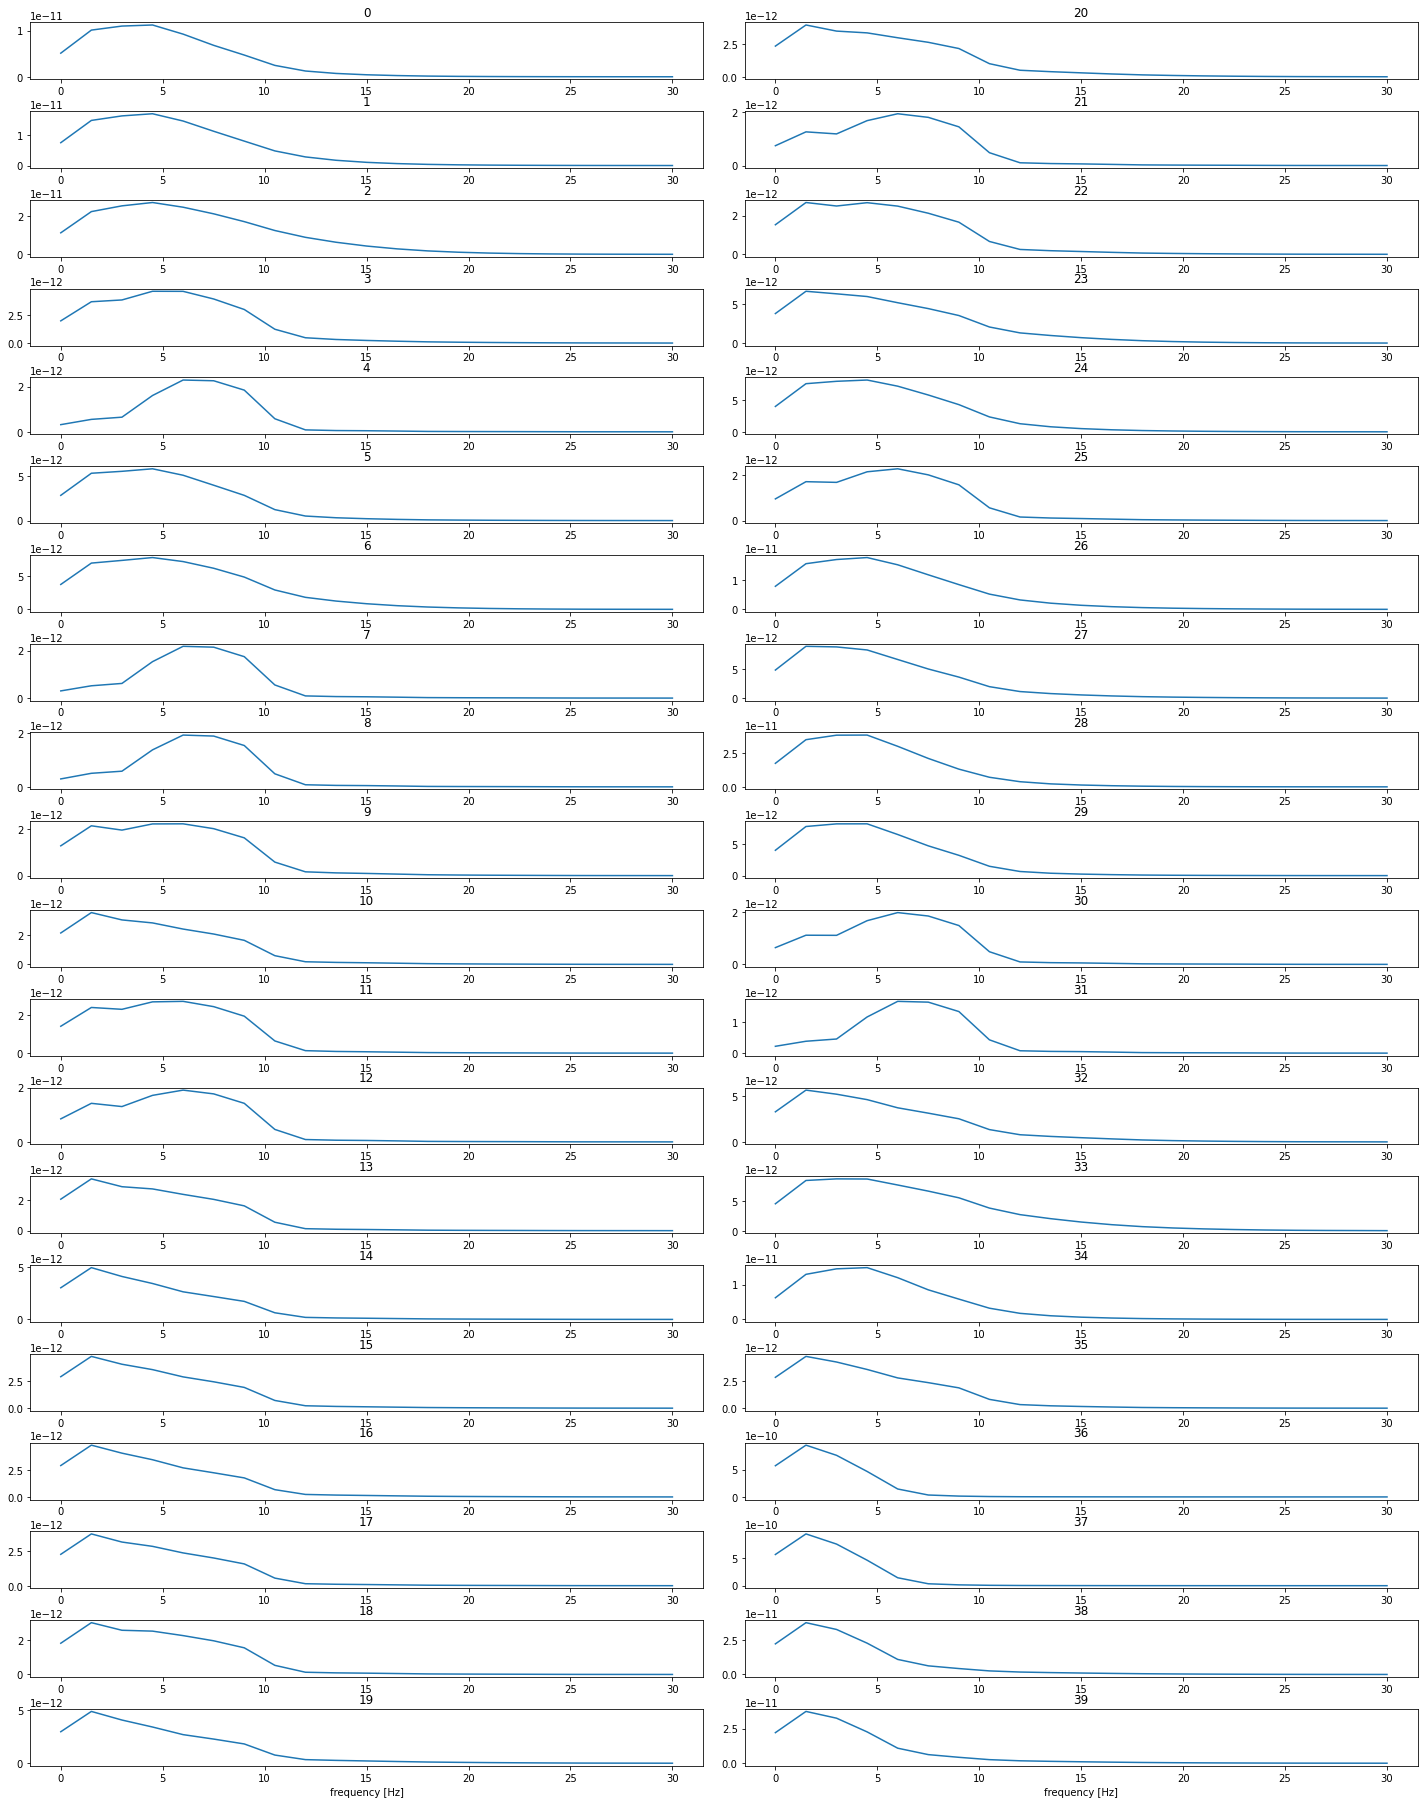

In [ ]:
fig, axs = plt.subplots(20, 2, figsize=(20,25))
axs[19,0].set_xlabel('frequency [Hz]')
axs[19,1].set_xlabel('frequency [Hz]')
fli = []
max_psd = []
fig.tight_layout()
for i in range(20):
    f, Pxx_den = signal.welch(final[:,i], 60, 'flattop',nperseg = 40)
    axs[i, 0].plot(f, Pxx_den)
    max_psd.append(max(Pxx_den))
    psd11 = []
    for (f1, psd1) in zip(f, Pxx_den):
        if(f1>=8 and f1<=15):
            psd11.append(psd1)
    fli.append(psd11)
    axs[i,0].set_title(i)
    #axs[i,0].set_ylabel('PSD [uV^2/Hz]')
for i in range(20,40):
    f, Pxx_den = signal.welch(final[:,i], 60, 'flattop', nperseg = 40)
    axs[i-20, 1].plot(f, Pxx_den)
    max_psd.append(max(Pxx_den))
    psd11 = []
    for (f1, psd1) in zip(f, Pxx_den):
        if(f1>=8 and f1<=15):
            psd11.append(psd1)
    fli.append(psd11)
    axs[i-20,1].set_title(i)
    #axs[i,0].set_ylabel('PSD [uV^2/Hz]')

In [ ]:
i = 0
for elem in fli:
    print(i)
    print(sum(elem), max_psd[i])
    print("")
    print(elem)
    print("")
    i+=1

0
9.570450287589228e-12 1.1201467139005994e-11

[4.698373784822554e-12, 2.4641248989649262e-12, 1.248930647440503e-12, 7.241309506241724e-13, 4.34890005737072e-13]

1
1.854548221046639e-11 1.7099269259917673e-11

[8.066729417508064e-12, 4.8329930935441875e-12, 2.848143848922377e-12, 1.7403337358956071e-12, 1.0572821145961556e-12]

2
4.916526335705552e-11 2.7148054152960842e-11

[1.7124331730035126e-11, 1.2474079626502076e-11, 8.902952348699431e-12, 6.327132113875845e-12, 4.3367675379430385e-12]

3
5.344332141154076e-12 4.689856042884691e-12

[3.0409304491353268e-12, 1.2537893254050076e-12, 4.833683840436205e-13, 3.2685015384589503e-13, 2.393938287242261e-13]

4
2.61289629879884e-12 2.2901383456134265e-12

[1.8437342987837706e-12, 5.78048227115187e-13, 8.57671648208732e-14, 5.6734340774097465e-14, 4.8612267304911283e-14]

5
5.137773234743675e-12 5.8547733142302825e-12

[2.8506446377609907e-12, 1.2393445700369408e-12, 5.143788118459445e-13, 3.206707063973765e-13, 2.1273450870242156e-13]


In [ ]:
import pyeeg

A:\AnacondaDataSc\lib\site-packages\pyeeg\detrended_fluctuation_analysis.py:125: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  F[i] += numpy.linalg.lstsq(c, y)[1]
A:\AnacondaDataSc\lib\site-packages\pyeeg\detrended_fluctuation_analysis.py:129: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  Alpha = numpy.linalg.lstsq(numpy.vstack(


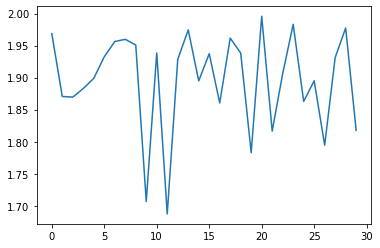

In [ ]:
ind = 30
dfa1 = []
for i in range(30):
    mc_cumsum = comps[:,i] - np.mean(comps[:, i])
    mcdf = pd.DataFrame(data=mc_cumsum)
    mcdf = mcdf.cumsum(axis = 0)
    dfa1.append(pyeeg.dfa(mcdf.values))
plt.plot(dfa1)

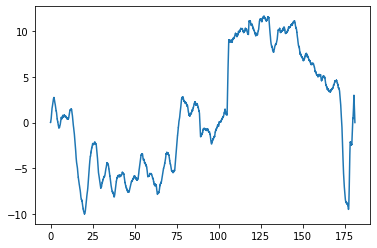

In [ ]:
x = []
for i in range(0,mcdf.shape[0]):
    x.append(i*0.001953125)
plt.plot(x, mcdf.iloc[:,:].values)

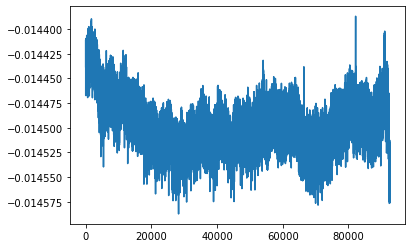

In [ ]:
plt.plot(final[:, 1])

In [ ]:
import eeglib

Complexity,        Activity,               Mobility 
9.75701417023125   3.813766114904777e-09   0.0947631457892802
23.94877387676622   2.5449770681376503e-08   0.2712129822705306
2.5797330748962874   2.6587068895941486e-10   0.02923321520216516


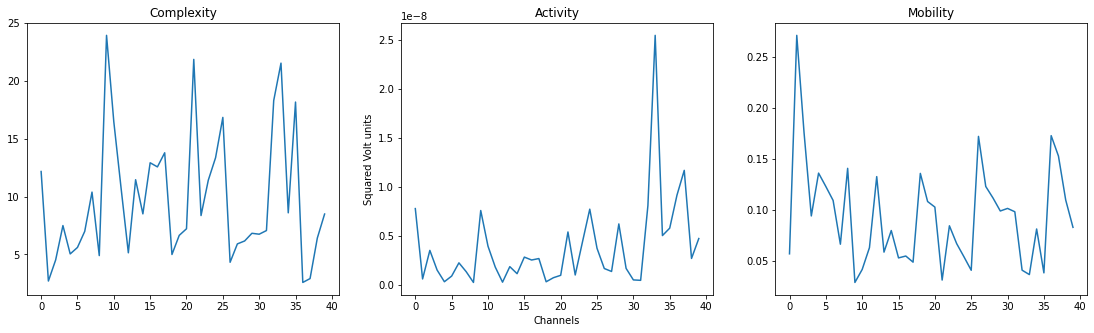

In [ ]:
dfa2 = []
dfa21 = []
dfa22 = []
for i in range(40):
    dfa2.append(eeglib.eeg.hjorthComplexity(final[:,i]))
    dfa21.append(eeglib.eeg.hjorthActivity(final[:,i]))
    dfa22.append(eeglib.eeg.hjorthMobility(final[:,i]))
fig, axs = plt.subplots(1, 3, figsize = (19,5))

axs[0].plot(dfa2)
axs[0].set_title("Complexity")

axs[1].plot(dfa21)
axs[1].set_title("Activity")
axs[1].set_xlabel("Channels")
axs[1].set_ylabel("Squared Volt units")

axs[2].plot(dfa22)
axs[2].set_title("Mobility")

print("Complexity,        Activity,               Mobility ")
print(np.mean(dfa2)," ", np.mean(dfa21)," ", np.mean(dfa22))
print(max(dfa2)," ", max(dfa21)," ", max(dfa22))
print(min(dfa2)," ", min(dfa21)," ", min(dfa22))

8.809722724922523

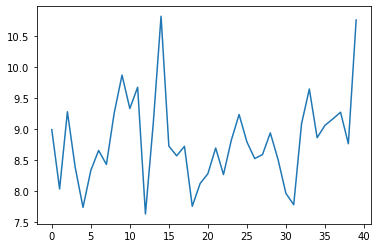

In [ ]:
ent = []
for i in range(40):
    pd_series = pd.Series(final[:,i])
    counts = pd_series.value_counts()
    entropy = scipy.stats.entropy(counts)
    ent.append(entropy)
plt.plot(ent)
np.mean(ent)